# IMDB Reviews Classification

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds

### Load the data

In [15]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

In [16]:
# This data is already pretokenized

tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [17]:
# Example of sub words tokenization
sample_string = "Tensorflow from basics to mastery"

tokenized_string = tokenizer.encode(sample_string)
print(f"Tokenized String is - {tokenized_string}")
original_string = tokenizer.decode(tokenized_string)
print(f"The Original String is - {original_string}")

Tokenized String is - [6307, 2327, 2934, 7961, 48, 4249, 4429, 7, 2652, 8050]
The Original String is - Tensorflow from basics to mastery


In [18]:
# to verify how the tokens map to the subwords
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
7961 ---->  
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


### Lets build and train the model

In [19]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [20]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 10
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 7s 8ms/step - loss: 0.6793 - accuracy: 0.5852 - val_loss: 0.6477 - val_accuracy: 0.6472
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 0.5748 - accuracy: 0.7657 - val_loss: 0.5205 - val_accuracy: 0.8479
Epoch 3/10
391/391 [==============================] - 3s 6ms/step - loss: 0.4433 - accuracy: 0.8601 - val_loss: 0.4231 - val_accuracy: 0.8540
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 0.3621 - accuracy: 0.8906 - val_loss: 0.3776 - val_accuracy: 0.8746
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 0.3064 - accuracy: 0.9084 - val_loss: 0.3459 - val_accuracy: 0.8779
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 0.2681 - accuracy: 0.9186 - val_loss: 0.3587 - val_accuracy: 0.8566
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 0.2401 - accuracy: 0.9277 - val_loss: 0.3328 - val_accuracy: 0.8747
Epoch 

### Check Model Accuracy and Loss

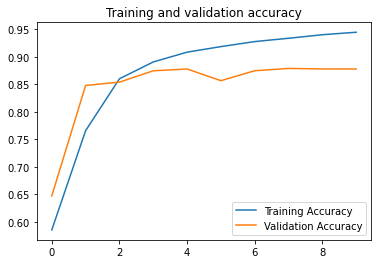

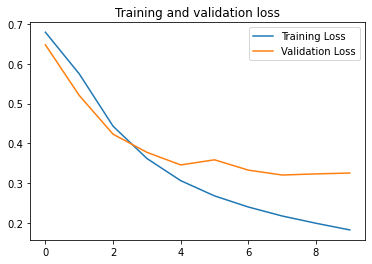

In [22]:
import matplotlib.pyplot as plt

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc, label='Training Accuracy' )
plt.plot  ( epochs, val_acc, label='Validation Accuracy' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, loss, label='Training Loss' )
plt.plot  ( epochs, val_loss, label='Validation Loss' )
plt.title ('Training and validation loss'   )
plt.legend()
plt.show()